In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, neural_network, neighbors, discriminant_analysis

%matplotlib inline
plt.rcParams['figure.figsize'] = (4, 4) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Plot Training Sample and Mesh

In [2]:
def plot_classifier(Xtr, ytr, alpha = 0.2, alpha_pt = None, fn = None, h = 0.01, file = None):

    fig = plt.figure()
    
    if fn:
        
        xx, yy = np.meshgrid(np.arange(-1.3, 1.3, h),np.arange(-1.3, 1.3, h))
        Z = fn(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = alpha)


    if alpha_pt: alpha = alpha_pt
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=40, cmap=plt.cm.viridis, alpha = alpha, linewidth = 0.1)
    
    plt.xlim([-1.3, 1.3])
    plt.ylim([-1.3, 1.3])
    
    if file: fig.savefig(file, bbox_inches='tight', pad_inches=0.1)


## Define a Spiral Dataset

In [3]:
def spiral_data(K, N = 1000, D = 2, noise_level = 0.4):

    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):

        ix = range(N*j,N*(j+1))

        spiral = np.linspace(0, 1.5 * np.pi,N)
        offset = 2 * np.pi * j / K
        noise  = np.random.randn(N)*noise_level

        theta  = spiral + noise + offset

        r = np.linspace(0.0,1,N) # radius    

        X[ix] = np.c_[r*np.sin(theta), r*np.cos(theta)]
        y[ix] = j # class
        
    return X, y

## Define Blobs

In [4]:
def blob_data(X = 2, Y = 2, N = 1000, D = 2, correlated = 0.5, noise_level = 1.0):

    K = X * Y
    
    par = np.zeros((N*K,D))
    cat = np.zeros(N*K, dtype='uint8')
    
    xstart = -0.5 if X > 1 else 0
    ystart = -0.5 if Y > 1 else 0
    
    xx, yy = np.meshgrid(np.linspace(xstart, 0.5, X), 
                         np.linspace(ystart, 0.5, Y))
    
    for j, (xctr,yctr) in enumerate(zip(xx.ravel(), yy.ravel())):

        ix = range(N*j,N*(j+1))

        corr = np.random.randn(N) * correlated 
        uncorr_x = np.random.randn(N) * (1 - correlated)
        uncorr_y = np.random.randn(N) * (1 - correlated)

        x = (corr + uncorr_x) * noise_level + xctr
        y = (corr + uncorr_y) * noise_level + yctr

        r = np.linspace(0.0,1,N) # radius    

        par[ix] = np.c_[x, y]
        cat[ix] = j 
        
    return par, cat

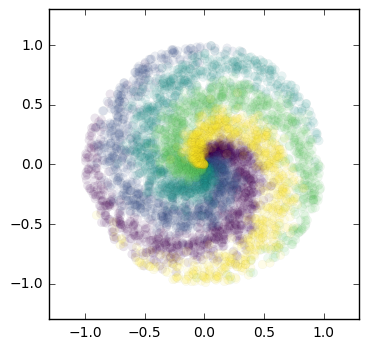

In [5]:
X, y = spiral_data(K = 5, noise_level = 0.4, N = 1000)
plot_classifier(X, y, alpha_pt = 0.1)

## Build a Neural Network "By Hand"
Example adapted from these, which have the same form.  There are very, very nice notes in the Stanford class.  Here we use the bias trick, while they do not.  This makes it a bit simpler, but also requires care to adding and dropping the extra column.
* http://cs231n.github.io/neural-networks-case-study/
* http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
See "No Bias Trick" for a copy without explicit bias nodes.

In [3]:
import numpy as np

# Single hidden layer
class my_nn():
    
    def __init__(self, classes, dim, Nhidden = 100, step_size = 0.5, regularization = 1e-3):
        
        # dimensions:
        # classes, input variables, hidden nodes

        # randomly initialization
        # Use the bias trick: + 1

        # step size and regularization
        
        pass
        
    
    def evaluate(self, X):
        
        # Evaluate the network in a forward pass.
        # Useful to save the hidden layer, for back propagation.
        scores = np.ones(X.shape[0])
        
        return scores
    
 
    def classify(self, X):
        
        return np.argmax(self.evaluate(X), axis=1)
    
    def train(self, X, y, iterations = 500):
        
        # gradient descent loop
        for it in range(iterations):
            
            pass

            # evaluate the scores -- call evaluate
            
            # compute the class probabilities
            # Hint: np.sum(exp_scores, axis=1, keepdims=True)

            # the gradient on scores, p_k - 1(yᵢ = k)

            # backpropate the gradient to the parameters
            # first backprop into W2 and regularize.
            # That's h · df.  Hope you saved the hidden layer!
            # Note that both h and df are matrices, to 
            # deal with the scores and hidden layers for 
            # every training object simultaneously.
            
            # Now calculate the gradient on the hidden layer,
            # and turn it off (ReLU) if self.h is negative.
            # Again, we're "quietly" multiplying matrices.
            
            # Now W1, dropping one from dimension for the bias node.
            # That's just X · dh
            # Then add the regularization term.

            # Update the parameters, backwards from the gradient.

            if it % 500 == 0 and it:
                print('Iteraction {}, accuracy: {:.1f}%'.\
                      format(it, 100. * np.mean(nn.classify(X) == y)))



In [7]:
X, y = spiral_data(K = 5, noise_level = 0.4, N = 1000)

In [8]:
K = len(set(y))
D = X.shape[1]
nn = my_nn(classes = K, dim = D)

Iteraction 500, accuracy: 29.8%
Iteraction 1000, accuracy: 43.5%
Iteraction 1500, accuracy: 64.4%
Iteraction 2000, accuracy: 70.1%
Iteraction 2500, accuracy: 72.6%
Iteraction 3000, accuracy: 73.8%
Iteraction 3500, accuracy: 74.4%
Iteraction 4000, accuracy: 75.0%
Iteraction 4500, accuracy: 75.2%
Iteraction 5000, accuracy: 75.3%


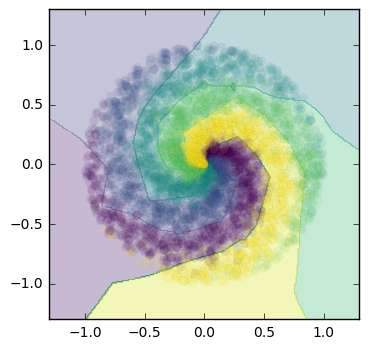

In [9]:
nn.train(X, y, iterations = 5001)
plot_classifier(X, y, fn = nn.classify, alpha = 0.3, alpha_pt = 0.1)